<a href="https://colab.research.google.com/github/PRATHAMSINGHTYADAV/Projects/blob/main/Zomato_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
con = sqlite3.connect(r'/content/drive/MyDrive/Project data /zomato_rawdata.sqlite')

In [ ]:
pd.read_sql_query("SELECT * FROM Users" , con).head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [ ]:
df.shape
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
index,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21


# **In Precentage**

In [ ]:
df.isnull().sum()/len(df)*100

,0
index,0.000000
url,0.000000
address,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
phone,2.335789
location,0.040606


In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# **Replacing Missing values**

In [ ]:
df['rate'].replace(('NEW' , '-'), np.nan , inplace = True)

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'] = df['rate'].apply(lambda x :float(x.split('/')[0]) if type(x)== str else x)

In [ ]:
x = pd.crosstab(df['rate'] , df['online_order'])

# **Normal stacked barchart**

<Axes: xlabel='rate'>

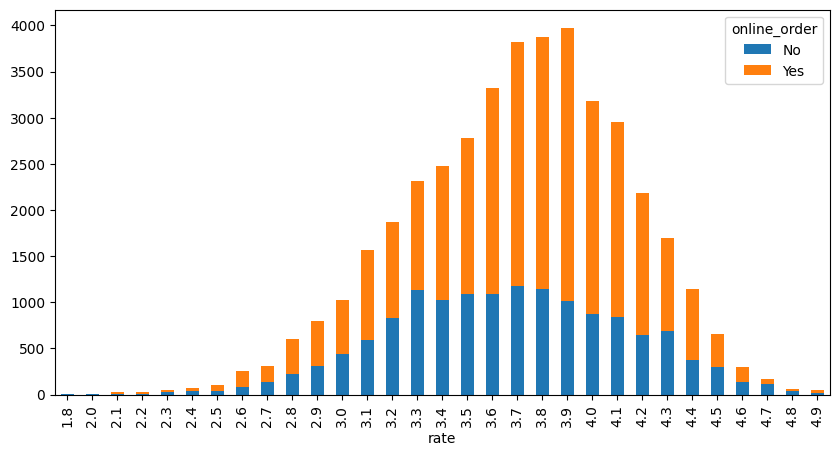

In [ ]:
x.plot(kind = 'bar' , stacked = True , figsize = (10,5))

In [ ]:
x.sum(axis = 1).astype(float)

,0
rate,
1.8,5.0
2.0,11.0
2.1,24.0
2.2,26.0
2.3,51.0
2.4,70.0
2.5,101.0
2.6,260.0
2.7,307.0


In [ ]:
normalize_df = x.div(x.sum(axis = 1).astype(float) , axis = 0)

In [ ]:
normalize_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


# **100% Stacked Barchart**

<Axes: xlabel='rate'>

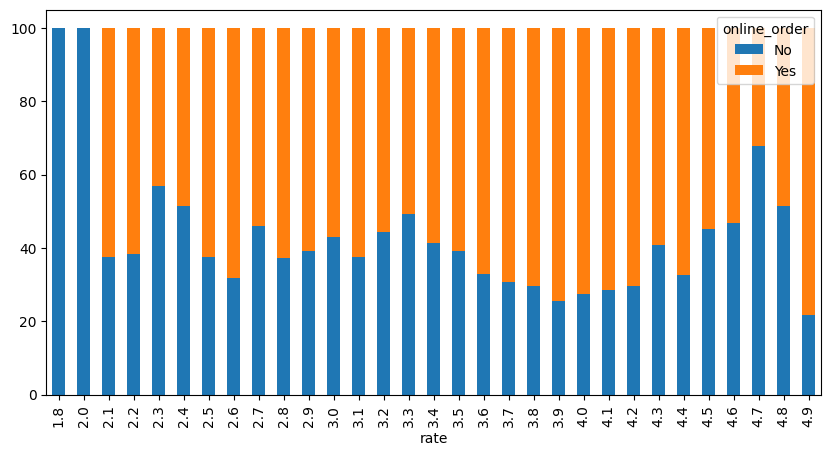

In [ ]:
(normalize_df*100).plot(kind = 'bar' , stacked = True , figsize = (10,5))

## **Text Cleaning**

In [ ]:
df['rest_type'].isnull().sum()

227

In [ ]:
data = df.dropna(subset = ['rest_type'])

In [ ]:
data['rest_type'].isnull().sum()

0

In [ ]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
Quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [ ]:
Quick_bites_df.shape

(20639, 18)

In [ ]:
Quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
Quick_bites_df['reviews_list']

,reviews_list
3,"[('Rated 4.0', ""RATED\n Great food and proper..."
23,"[('Rated 4.0', ""RATED\n So, went here with fr..."
26,"[('Rated 5.0', 'RATED\n please provide some e..."
31,"[('Rated 1.0', ""RATED\n Worst restaurant ever..."
34,"[('Rated 3.0', 'RATED\n Not worth for the mon..."
...,...
51641,"[('Rated 2.0', ""RATED\n Food is not upto the ..."
51642,[]
51643,[]
51644,[]


In [ ]:
Quick_bites_df['reviews_list'] = Quick_bites_df['reviews_list'].apply(lambda x : x.lower())

In [ ]:
Quick_bites_df['reviews_list']

,reviews_list
3,"[('rated 4.0', ""rated\n great food and proper..."
23,"[('rated 4.0', ""rated\n so, went here with fr..."
26,"[('rated 5.0', 'rated\n please provide some e..."
31,"[('rated 1.0', ""rated\n worst restaurant ever..."
34,"[('rated 3.0', 'rated\n not worth for the mon..."
...,...
51641,"[('rated 2.0', ""rated\n food is not upto the ..."
51642,[]
51643,[]
51644,[]


In [ ]:
from nltk.corpus import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [ ]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [ ]:
tokenizer.tokenize(Quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [ ]:
review_token = Quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

# **Unigram Analysis**

In [ ]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = stopwords.words('english')

In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop.extend(['rated' , 'RATED', 'n','x','\n','nan','NAN', 'Rated'])

In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
rev_3 = review_token[3]

In [ ]:
print([token for token in rev_3 if token not in stop])

['great', 'food', 'proper', 'karnataka', 'style', 'full', 'meals', 'twice', 'fully', 'satisfied', 'give', 'stars', 'well', 'managed', 'reached', 'place', 'pm', 'saturday', 'half', 'items', 'menu', 'annoying', 'food', 'cold', 'taste', 'also', 'average', 'dosa', 'holige', 'good', 'people', 'restaurant', 'service', 'still', 'slow', 'waiters', 'standing', 'one', 'corner', 'talking', 'call', 'repeatedly', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'one', 'good', 'hotel', 'price', 'udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'cant', 'clean', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us', 'full', 'amount', 'lastly', 'u', 'r', 'ok', 'b', 'seated', 'random', 'people', 'adjust', 'table', 'mann

In [ ]:
review_token_clean = review_token.apply(lambda x : [token for token in x if token not in stop])

In [ ]:
review_token_clean

,reviews_list
3,"[great, food, proper, karnataka, style, full, ..."
23,"[went, friends, tea, ambience, striking, say, ..."
26,"[please, provide, extra, sambal, quantity, les..."
31,"[worst, restaurant, ever, veg, manchurian, wor..."
34,"[worth, money, pay, ambience, good, enough, se..."
...,...
51641,"[food, upto, mark, nquantity, food, little, nc..."
51642,[]
51643,[]
51644,[]


In [ ]:
total_reviews_2D = list(review_token_clean)

In [ ]:
total_review_1D = []
for review in total_reviews_2D:
  for word in review:
    total_review_1D.append(word)

In [ ]:
total_review_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [ ]:
from nltk import FreqDist
fd = FreqDist()

In [ ]:
for word in total_review_1D:
    fd[word] = fd[word] +1

In [ ]:
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

### Uni-gram **analysis**

<Axes: xlabel='Samples', ylabel='Counts'>

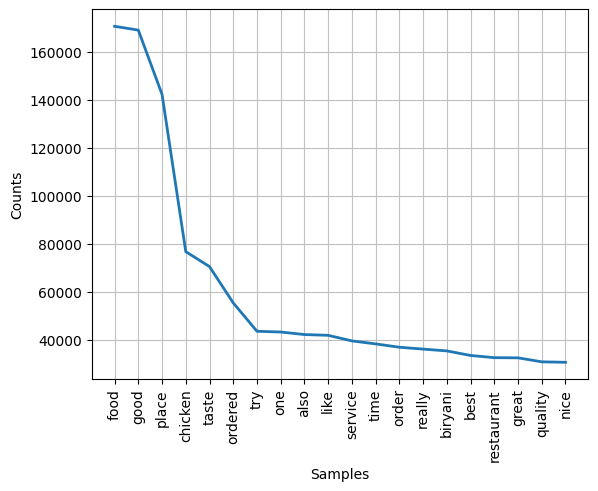

In [ ]:
fd.plot(20)

### Bi-gram and Tri_gram **analysis**

In [ ]:
from nltk import FreqDist , bigrams , trigrams

# **Bi-gram**

In [ ]:
bi_grams = bigrams(total_review_1D)

In [ ]:
bi_grams

<generator object bigrams at 0x7c48c0895a10>

In [ ]:
fd_bi = FreqDist()
for bigrams in bi_grams:
  fd_bi[bigrams] = fd_bi[bigrams] + 1

In [ ]:
fd_bi.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256)]

<Axes: xlabel='Samples', ylabel='Counts'>

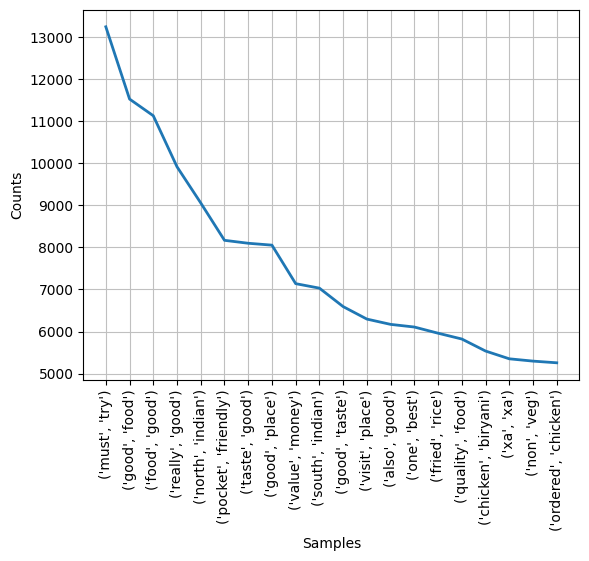

In [ ]:
fd_bi.plot(20)

In [ ]:
fd_bi.most_common(100)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256),
 (('indian', 'food'), 4992),
 (('masala', 'dosa'), 4828),
 (('good', 'good'), 4755),
 (('f', 'f'), 4744),
 (('home', 'delivery'), 4721),
 (('food', 'quality'), 4407),
 (('small', 'place'), 4375),
 (('must', 'visit'), 4347),
 (('nice', 'place'), 4287),
 (('tasty', 'food'), 4051),
 (('best', 'place'), 3910),
 (('great', 'place'), 3704),
 (('good', 'service'), 3665),
 (('first', 'time'), 3558),
 (('take', 'away'), 3530),
 (('go

# **Tri-gram**

In [ ]:
tri_gram = trigrams(total_review_1D)

In [ ]:
tri_gram

<generator object trigrams at 0x7c48c0896420>

In [ ]:
fd_tri = FreqDist()
for trigrams in tri_gram:
  fd_tri[trigrams] = fd_tri[trigrams] + 1

In [ ]:
fd_tri.most_common(50)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693),
 (('keep', 'good', 'work'), 692),
 (('taste', 'really', 'good'), 686),
 (('home', 'cooked', 'food'), 653),
 (('quality', 'food', 'good'), 649),
 (('food', 'quality', 'good'), 

<Axes: xlabel='Samples', ylabel='Counts'>

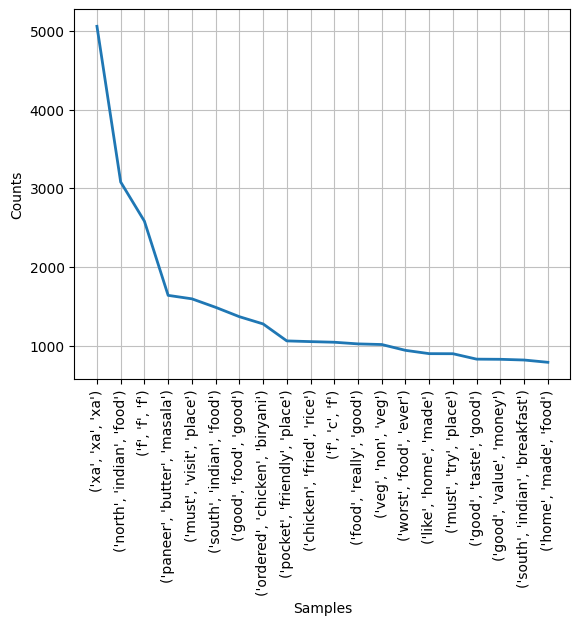

In [ ]:
fd_tri.plot(20)

In [ ]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
import geocoder as geo

In [ ]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [ ]:
len(df['location'].unique())

94

In [ ]:
df['location'] = df['location'] + ", Bangalore , Karnataka , India"

In [ ]:
df['location'].unique()

array(['Banashankari, Bangalore , Karnataka , India',
       'Basavanagudi, Bangalore , Karnataka , India',
       'Mysore Road, Bangalore , Karnataka , India',
       'Jayanagar, Bangalore , Karnataka , India',
       'Kumaraswamy Layout, Bangalore , Karnataka , India',
       'Rajarajeshwari Nagar, Bangalore , Karnataka , India',
       'Vijay Nagar, Bangalore , Karnataka , India',
       'Uttarahalli, Bangalore , Karnataka , India',
       'JP Nagar, Bangalore , Karnataka , India',
       'South Bangalore, Bangalore , Karnataka , India',
       'City Market, Bangalore , Karnataka , India',
       'Nagarbhavi, Bangalore , Karnataka , India',
       'Bannerghatta Road, Bangalore , Karnataka , India',
       'BTM, Bangalore , Karnataka , India',
       'Kanakapura Road, Bangalore , Karnataka , India',
       'Bommanahalli, Bangalore , Karnataka , India', nan,
       'CV Raman Nagar, Bangalore , Karnataka , India',
       'Electronic City, Bangalore , Karnataka , India',
       'HSR, Ba

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['location'].isnull().sum()

21

In [ ]:
df_copy = df_copy.dropna(subset = ['location'])

In [ ]:
df_copy['location'].isnull().sum()

0

In [ ]:
Locations = pd.DataFrame(df_copy['location'].unique())

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
Locations.columns = ['location']

In [ ]:
Geolocater = Nominatim(user_agent = 'app' , timeout = None)

In [ ]:
lat = []
long = []
for location in Locations['location']:
  location = Geolocater.geocode(location)
  if location is None:
    lat.append(np.nan)
    long.append(np.nan)
  else:
    lat.append(location.latitude)
    long.append(location.longitude)


In [ ]:
Locations['latitude'] = lat
Locations['longitude'] = long

In [ ]:
Locations.isnull().sum()

,0
location,0
latitude,2
longitude,2


In [ ]:
Locations[Locations['latitude'].isna()]

,location,latitude,longitude
79,"Rammurthy Nagar, Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar, Bangalore , Karnataka , India",NaN,NaN


In [ ]:
Locations['latitude'][79] = 13.0120218
Locations['longitude'][79] = 77.6777817

In [ ]:
Locations['latitude'][85] = 13.0068
Locations['longitude'][85] = 77.5813

In [ ]:
df['cuisines'].isnull().sum()

45

In [ ]:
df['cuisines']

,cuisines
0,"North Indian, Mughlai, Chinese"
1,"Chinese, North Indian, Thai"
2,"Cafe, Mexican, Italian"
3,"South Indian, North Indian"
4,"North Indian, Rajasthani"
...,...
51712,Continental
51713,Finger Food
51714,Finger Food
51715,Finger Food


In [ ]:
df = df.dropna(subset = ['cuisines'])

In [ ]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [ ]:
north_india.shape

(21085, 18)

In [ ]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns = {'index' : 'location'})

In [ ]:
heatmap_df = north_india_rest_count.merge(Locations,on = 'location' , how  = 'left')

In [ ]:
heatmap_df.head(2)

,location,count,latitude,longitude
0,"BTM, Bangalore , Karnataka , India",2469,12.916360,77.604733
1,"HSR, Bangalore , Karnataka , India",1123,12.900563,77.649475


In [ ]:
import folium

In [ ]:
basemap = folium.Map()

In [ ]:
from folium.plugins import HeatMap

In [ ]:
HeatMap(heatmap_df[['latitude' , 'longitude' , 'count']]).add_to(basemap)

In [ ]:
basemap